In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import plotly.express as px

In [2]:
url = 'https://en.wikipedia.org/wiki/Language'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [3]:
table = soup.find('table', class_='wikitable')

In [4]:
for sup in table.find_all("sup", class_="reference"):
    sup.decompose() 

In [5]:
for br in table.find_all("br"):
    br.replace_with(" ")  

In [6]:
rows = []
for tr in table.select("tr"):
    cells = [td.get_text(" ", strip=True)
             for td in tr.find_all(["th", "td"])]
    if cells:
        rows.append(cells)

for r in rows:
    print(r)

['Language', 'Native speakers (millions)']
['Mandarin', '848']
['Spanish', '329']
['English', '328']
['Portuguese', '250']
['Arabic', '221']
['Hindi', '182']
['Bengali', '181']
['Russian', '144']
['Japanese', '122']
['Javanese', '84.3']


In [7]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df

,Language,Native speakers (millions)
0,Mandarin,848
1,Spanish,329
2,English,328
3,Portuguese,250
4,Arabic,221
5,Hindi,182
6,Bengali,181
7,Russian,144
8,Japanese,122
9,Javanese,84.3


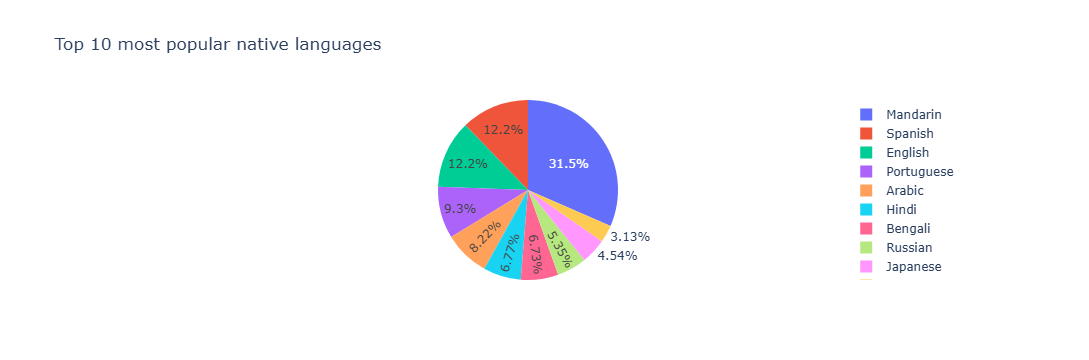

In [8]:
fig = px.pie(df, values='Native speakers (millions)', names='Language', title='Top 10 most popular native languages')
fig.show()

In [9]:
df["Native speakers (millions)"] = df["Native speakers (millions)"].astype(float)

world_pop = 8000
total = 0
other_pop = world_pop-df["Native speakers (millions)"].sum()

df.loc[len(df)] = ["Other", other_pop]

print(df.tail())

    Language  Native speakers (millions)
6    Bengali                       181.0
7    Russian                       144.0
8   Japanese                       122.0
9   Javanese                        84.3
10     Other                      5310.7


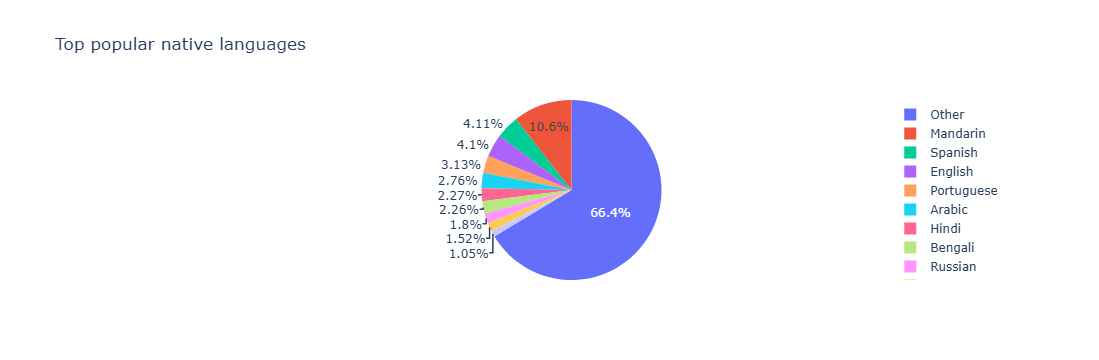

In [10]:
fig = px.pie(df, values='Native speakers (millions)', names='Language', title='Top popular native languages')
fig.show()